In [48]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, root_mean_squared_error
import lightgbm
import scipy
import statsmodels
import matplotlib.pyplot as plt
import seaborn as sns

## 1. Introduction.

5 examples of ML in real life:
 1. Automated driving cars like tesla etc. It is really helpful to hafe auto driving ai model in your car in cases when you are tired.
 2. Face recogintion on phones and some entrances. It is way more faster and easier to validate someone instead of using passwords
 3. Recommendations algorithms/ai in most social media apps like instagram.
 4. Real estate price predictions.
 5. Market trends predictions for gold and currencies etc.

Classification of task abouve (i presume):
 1. Unsuppervised learning - Deep Learning or Neural Networks
 2. Unsuppervised learning - Assosiacion
 3. Unsuppervised learning - Assosiacion
 4. Suppervised - Linear Regression
 5. Suppervised - Linear Regression

##### Multiclass vs Multilabel
1. Only one class can be predicted for each example. Typically mutually exclusive categories (e.g., an image is a cat or a dog, but not both) [5].
2. Multiple classes can be predicted for each example. Classes are not mutually exclusive (e.g., an image can contain both a cat and a dog) [5].

##### Yes, house prices are from regression algorithms
A case involving house prices is fundamentally a regression problem. In this scenario, the objective is to predict a continuous numerical value—the exact price of the house—rather than a discrete category or class. 


## 2. Introduction to Data Analysis

In [2]:
all_data = pd.read_json('./data/train.json')
all_data

,bathrooms,bedrooms,building_id,created,description,display_address,features,latitude,listing_id,longitude,manager_id,photos,price,street_address,interest_level
4,1.0,1,8579a0b0d54db803821a35a4a615e97a,2016-06-16 05:55:27,Spacious 1 Bedroom 1 Bathroom in Williamsburg!...,145 Borinquen Place,"[Dining Room, Pre-War, Laundry in Building, Di...",40.7108,7170325,-73.9539,a10db4590843d78c784171a107bdacb4,[https://photos.renthop.com/2/7170325_3bb5ac84...,2400,145 Borinquen Place,medium
6,1.0,2,b8e75fc949a6cd8225b455648a951712,2016-06-01 05:44:33,BRAND NEW GUT RENOVATED TRUE 2 BEDROOMFind you...,East 44th,"[Doorman, Elevator, Laundry in Building, Dishw...",40.7513,7092344,-73.9722,955db33477af4f40004820b4aed804a0,[https://photos.renthop.com/2/7092344_7663c19a...,3800,230 East 44th,low
9,1.0,2,cd759a988b8f23924b5a2058d5ab2b49,2016-06-14 15:19:59,**FLEX 2 BEDROOM WITH FULL PRESSURIZED WALL**L...,East 56th Street,"[Doorman, Elevator, Laundry in Building, Laund...",40.7575,7158677,-73.9625,c8b10a317b766204f08e613cef4ce7a0,[https://photos.renthop.com/2/7158677_c897a134...,3495,405 East 56th Street,medium
10,1.5,3,53a5b119ba8f7b61d4e010512e0dfc85,2016-06-24 07:54:24,A Brand New 3 Bedroom 1.5 bath ApartmentEnjoy ...,Metropolitan Avenue,[],40.7145,7211212,-73.9425,5ba989232d0489da1b5f2c45f6688adc,[https://photos.renthop.com/2/7211212_1ed4542e...,3000,792 Metropolitan Avenue,medium
15,1.0,0,bfb9405149bfff42a92980b594c28234,2016-06-28 03:50:23,Over-sized Studio w abundant closets. Availabl...,East 34th Street,"[Doorman, Elevator, Fitness Center, Laundry in...",40.7439,7225292,-73.9743,2c3b41f588fbb5234d8a1e885a436cfa,[https://photos.renthop.com/2/7225292_901f1984...,2795,340 East 34th Street,low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124000,1.0,3,92bbbf38baadfde0576fc496bd41749c,2016-04-05 03:58:33,There is 700 square feet of recently renovated...,W 171 Street,"[Elevator, Dishwasher, Hardwood Floors]",40.8433,6824800,-73.9396,a61e21da3ba18c7a3d54cfdcc247e1f8,[https://photos.renthop.com/2/6824800_0682be16...,2800,620 W 171 Street,low
124002,1.0,2,5565db9b7cba3603834c4aa6f2950960,2016-04-02 02:25:31,"2 bedroom apartment with updated kitchen, rece...",Broadway,"[Common Outdoor Space, Cats Allowed, Dogs Allo...",40.8198,6813268,-73.9578,8f90e5e10e8a2d7cf997f016d89230eb,[https://photos.renthop.com/2/6813268_1e6fcc32...,2395,3333 Broadway,medium
124004,1.0,1,67997a128056ee1ed7d046bbb856e3c7,2016-04-26 05:42:03,No Brokers Fee * Never Lived 1 Bedroom 1 Bathr...,210 Brighton 15th St,"[Dining Room, Elevator, Pre-War, Laundry in Bu...",40.5765,6927093,-73.9554,a10db4590843d78c784171a107bdacb4,[https://photos.renthop.com/2/6927093_93a52104...,1850,210 Brighton 15th St,medium
124008,1.0,2,3c0574a740154806c18bdf1fddd3d966,2016-04-19 02:47:33,Wonderful Bright Chelsea 2 Bedroom apartment o...,West 21st Street,"[Pre-War, Laundry in Unit, Dishwasher, No Fee,...",40.7448,6892816,-74.0017,c3cd45f4381ac371507090e9ffabea80,[https://photos.renthop.com/2/6892816_1a8d087a...,4195,350 West 21st Street,medium


In [3]:
all_data.shape

(49352, 15)

In [4]:
all_data.columns

Index(['bathrooms', 'bedrooms', 'building_id', 'created', 'description',
       'display_address', 'features', 'latitude', 'listing_id', 'longitude',
       'manager_id', 'photos', 'price', 'street_address', 'interest_level'],
      dtype='object')

In [5]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 49352 entries, 4 to 124009
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   bathrooms        49352 non-null  float64
 1   bedrooms         49352 non-null  int64  
 2   building_id      49352 non-null  object 
 3   created          49352 non-null  object 
 4   description      49352 non-null  object 
 5   display_address  49352 non-null  object 
 6   features         49352 non-null  object 
 7   latitude         49352 non-null  float64
 8   listing_id       49352 non-null  int64  
 9   longitude        49352 non-null  float64
 10  manager_id       49352 non-null  object 
 11  photos           49352 non-null  object 
 12  price            49352 non-null  int64  
 13  street_address   49352 non-null  object 
 14  interest_level   49352 non-null  object 
dtypes: float64(3), int64(3), object(9)
memory usage: 6.0+ MB


In [6]:
all_data.describe()

,bathrooms,bedrooms,latitude,listing_id,longitude,price
count,49352.00000,49352.000000,49352.000000,4.935200e+04,49352.000000,4.935200e+04
mean,1.21218,1.541640,40.741545,7.024055e+06,-73.955716,3.830174e+03
std,0.50142,1.115018,0.638535,1.262746e+05,1.177912,2.206687e+04
min,0.00000,0.000000,0.000000,6.811957e+06,-118.271000,4.300000e+01
25%,1.00000,1.000000,40.728300,6.915888e+06,-73.991700,2.500000e+03
50%,1.00000,1.000000,40.751800,7.021070e+06,-73.977900,3.150000e+03
75%,1.00000,2.000000,40.774300,7.128733e+06,-73.954800,4.100000e+03
max,10.00000,8.000000,44.883500,7.753784e+06,0.000000,4.490000e+06


In [7]:
all_data.corr(numeric_only=True)

,bathrooms,bedrooms,latitude,listing_id,longitude,price
bathrooms,1.000000,0.533446,-0.009657,0.000776,0.010393,0.069661
bedrooms,0.533446,1.000000,-0.004745,0.011968,0.006892,0.051788
latitude,-0.009657,-0.004745,1.000000,0.001712,-0.966807,-0.000707
listing_id,0.000776,0.011968,0.001712,1.000000,-0.000907,0.008090
longitude,0.010393,0.006892,-0.966807,-0.000907,1.000000,-0.000087
price,0.069661,0.051788,-0.000707,0.008090,-0.000087,1.000000


In [8]:
training_data = all_data[['bathrooms', 'bedrooms', 'interest_level', 'price']]
training_data.reset_index(drop=True, inplace=True)
training_data

,bathrooms,bedrooms,interest_level,price
0,1.0,1,medium,2400
1,1.0,2,low,3800
2,1.0,2,medium,3495
3,1.5,3,medium,3000
4,1.0,0,low,2795
...,...,...,...,...
49347,1.0,3,low,2800
49348,1.0,2,medium,2395
49349,1.0,1,medium,1850
49350,1.0,2,medium,4195


## 3. Statistical Data Analysis

Text(0.5, 1.0, 'Price Comparisons')

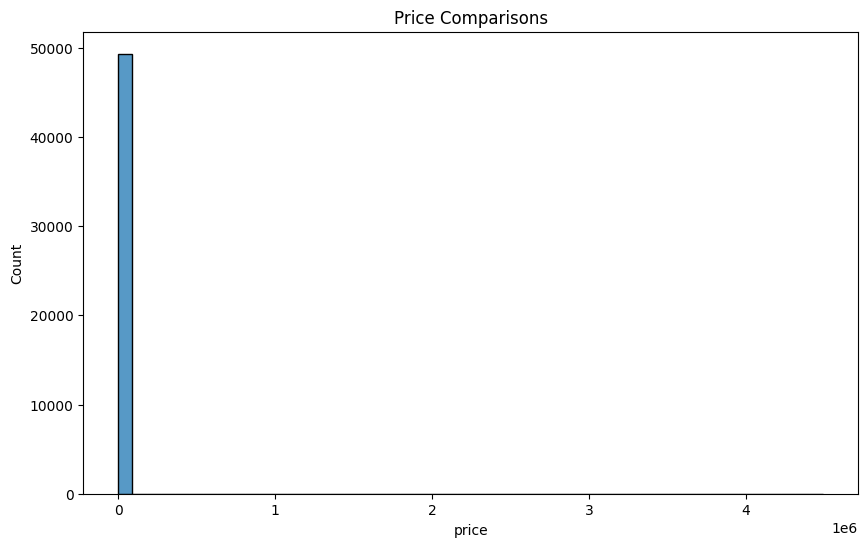

In [9]:
plt.figure(figsize=(10,6))
sns.histplot(
    data=training_data,
    bins=50,
    x='price')
plt.title('Price Comparisons')

### Answer:
#### No. The distribution is distorted by extreme outliers.

Text(0.5, 1.0, 'Comparison by interest levels')

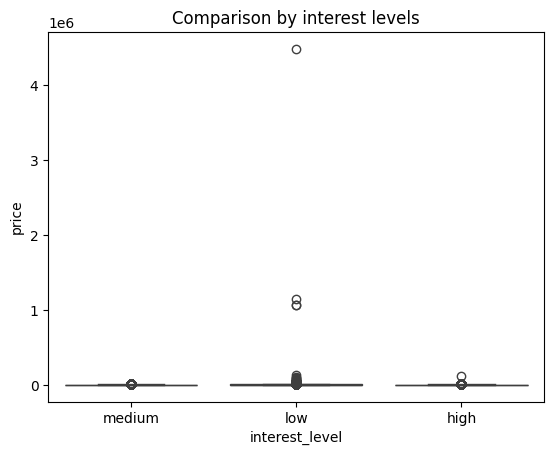

In [10]:
sns.boxplot(data=training_data, x='interest_level', y='price')
plt.title('Comparison by interest levels')

### Answer:
#### Definetely yes! there are

In [11]:
extr_low = training_data['price'].quantile(0.01)
extr_high = training_data['price'].quantile(0.99)
cleaned_data = training_data[(training_data['price'] > extr_low) & (training_data['price'] < extr_high)]

<Axes: xlabel='price', ylabel='Count'>

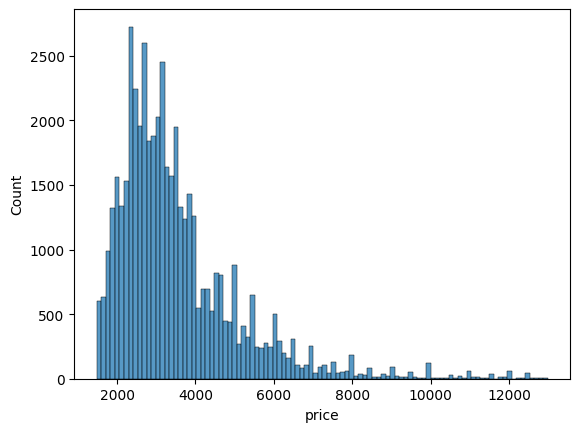

In [12]:
sns.histplot(data=cleaned_data, bins=100, x='price')

#### The data is left scewed

In [13]:
cleaned_data['interest_level'].value_counts()

interest_level
low       33672
medium    11114
high       3557
Name: count, dtype: int64

Text(0.5, 1.0, 'Comparison on cleaned data')

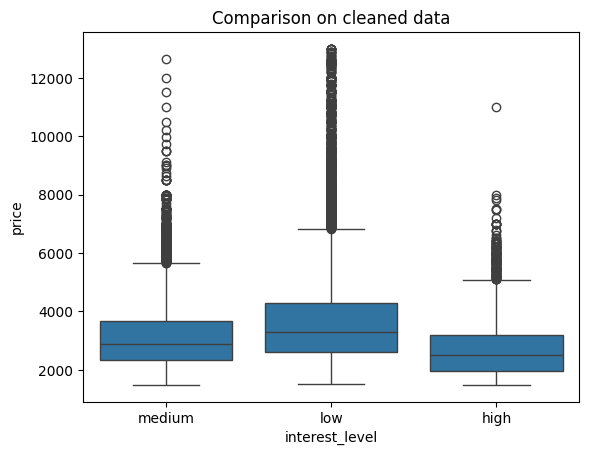

In [14]:
sns.boxplot(data=cleaned_data, x='interest_level', y='price')
plt.title('Comparison on cleaned data')

In [15]:
mask_low = cleaned_data['interest_level'] == 'low'
mask_medium = cleaned_data['interest_level'] == 'medium'
mask_high = cleaned_data['interest_level'] == 'high'

cleaned_data.loc[mask_low, 'interest_level'] = 1
cleaned_data.loc[mask_medium, 'interest_level'] = 2
cleaned_data.loc[mask_high, 'interest_level'] = 3
cleaned_data['interest_level']


0        2
1        1
2        2
3        2
4        1
        ..
49347    1
49348    2
49349    2
49350    2
49351    3
Name: interest_level, Length: 48343, dtype: object

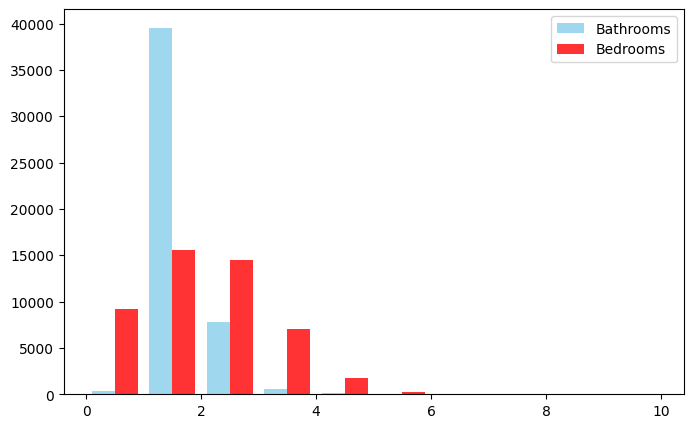

In [16]:
fig, ax1 = plt.subplots(1, 1, figsize=(8, 5))
ax1.hist(
    [cleaned_data['bathrooms'], cleaned_data['bedrooms']],
    color=['skyblue', 'red'],
    alpha=0.8,
    label=['Bathrooms', 'Bedrooms'])
plt.legend()
plt.show()

In [17]:
corr_matrix = cleaned_data.corr()
corr_matrix

,bathrooms,bedrooms,interest_level,price
bathrooms,1.000000,0.517200,-0.062819,0.670808
bedrooms,0.517200,1.000000,0.051282,0.547310
interest_level,-0.062819,0.051282,1.000000,-0.199652
price,0.670808,0.547310,-0.199652,1.000000


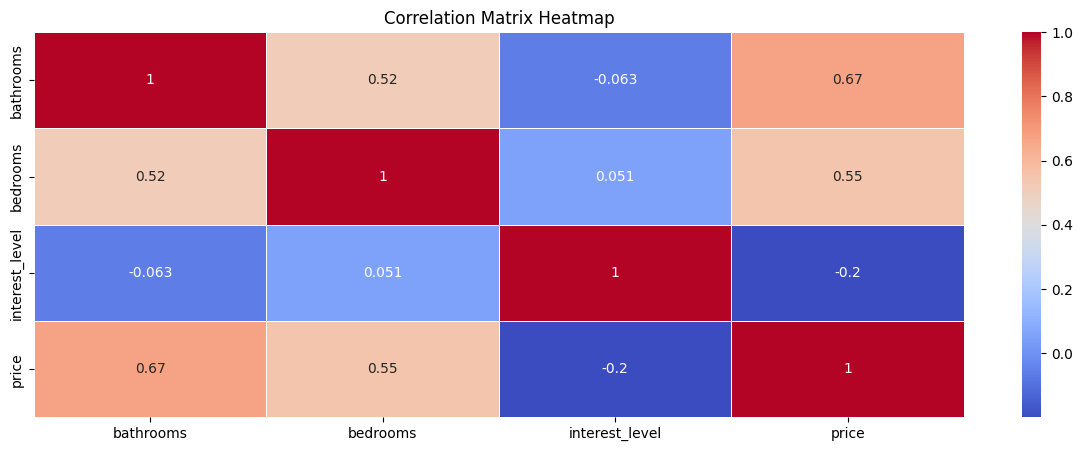

In [18]:
plt.figure(figsize=(15, 5))
sns.heatmap(
    corr_matrix,
    annot=True,
    cmap='coolwarm',
    linewidth=0.5
)
plt.title('Correlation Matrix Heatmap')
plt.show()

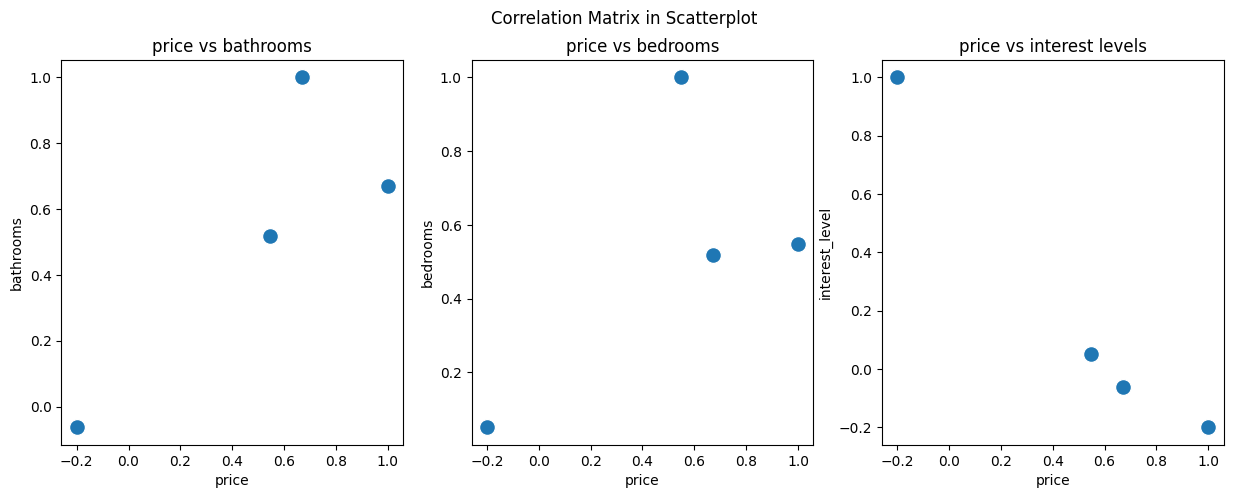

In [19]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))
sns.scatterplot(
    corr_matrix,
    x='price',
    y='bathrooms',
    ax=ax1,
    s=130
)
ax1.set_title('price vs bathrooms')
sns.scatterplot(
    corr_matrix,
    x='price',
    y='bedrooms',
    ax=ax2,
    s=130
)
ax2.set_title('price vs bedrooms')
sns.scatterplot(
    corr_matrix,
    x='price',
    y='interest_level',
    ax=ax3,
    s=130
)
ax3.set_title('price vs interest levels')
fig.suptitle('Correlation Matrix in Scatterplot')
plt.show()

## Creating Features

In [20]:
cleaned_data.loc[:, 'bathrooms_sq'] = cleaned_data['bathrooms'] ** 2
cleaned_data.loc[:, 'bedrooms_sq'] = cleaned_data['bedrooms'] ** 2
cleaned_data.loc[:, 'interest_level_sq'] = cleaned_data['interest_level'] ** 2

/tmp/ipykernel_19135/2263952565.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_data.loc[:, 'bathrooms_sq'] = cleaned_data['bathrooms'] ** 2
/tmp/ipykernel_19135/2263952565.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_data.loc[:, 'bedrooms_sq'] = cleaned_data['bedrooms'] ** 2
/tmp/ipykernel_19135/2263952565.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in th

In [21]:
sq_corr_matrix = cleaned_data[['bathrooms_sq', 'bedrooms_sq', 'interest_level_sq', 'price']].corr()
sq_corr_matrix

,bathrooms_sq,bedrooms_sq,interest_level_sq,price
bathrooms_sq,1.000000,0.521951,-0.065815,0.646949
bedrooms_sq,0.521951,1.000000,0.042725,0.544612
interest_level_sq,-0.065815,0.042725,1.000000,-0.194344
price,0.646949,0.544612,-0.194344,1.000000


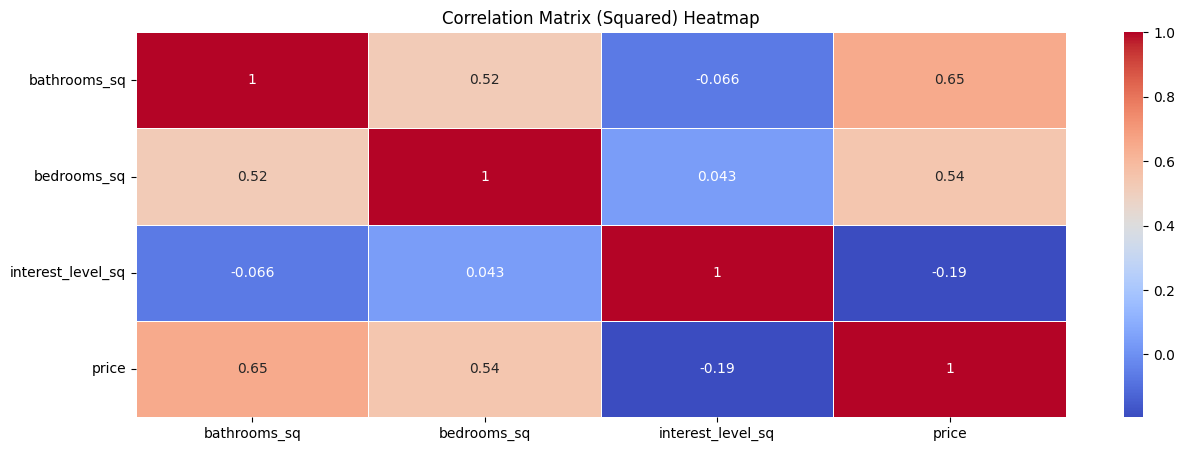

In [22]:
plt.figure(figsize=(15, 5))
sns.heatmap(
    sq_corr_matrix,
    annot=True,
    cmap='coolwarm',
    linewidth=0.5
)
plt.title('Correlation Matrix (Squared) Heatmap')
plt.show()

#### Almost identical except small changes

In [23]:
cleaned_data

,bathrooms,bedrooms,interest_level,price,bathrooms_sq,bedrooms_sq,interest_level_sq
0,1.0,1,2,2400,1.00,1,4
1,1.0,2,1,3800,1.00,4,1
2,1.0,2,2,3495,1.00,4,4
3,1.5,3,2,3000,2.25,9,4
4,1.0,0,1,2795,1.00,0,1
...,...,...,...,...,...,...,...
49347,1.0,3,1,2800,1.00,9,1
49348,1.0,2,2,2395,1.00,4,4
49349,1.0,1,2,1850,1.00,1,4
49350,1.0,2,2,4195,1.00,4,4


<Axes: xlabel='bathrooms', ylabel='price'>

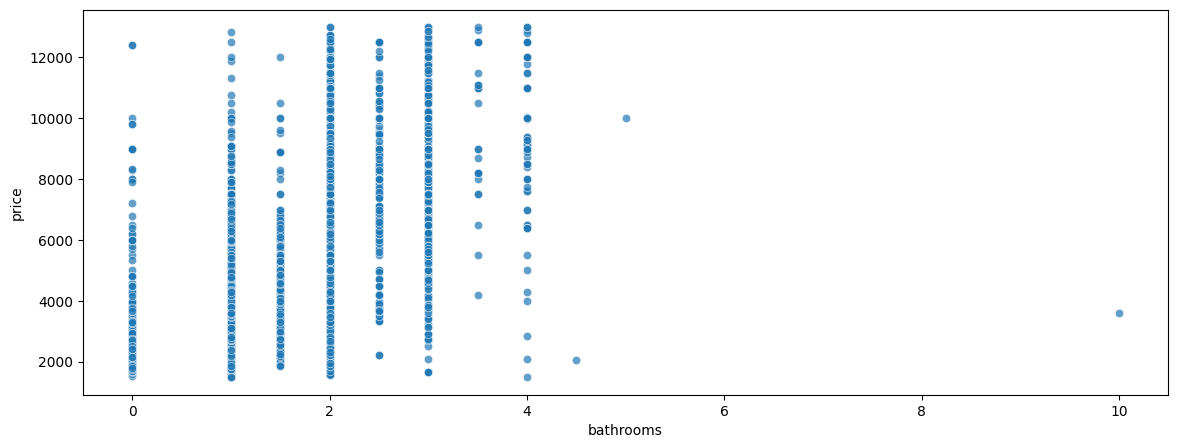

In [24]:
plt.figure(figsize=(14, 5))
sns.scatterplot(
    data=cleaned_data,
    x='bathrooms',
    y='price',
    alpha=0.7
)


In [25]:
test_data = pd.read_json('./data/test.json')
test_data

,bathrooms,bedrooms,building_id,created,description,display_address,features,latitude,listing_id,longitude,manager_id,photos,price,street_address
0,1.0,1,79780be1514f645d7e6be99a3de696c5,2016-06-11 05:29:41,Large with awesome terrace--accessible via bed...,Suffolk Street,"[Elevator, Laundry in Building, Laundry in Uni...",40.7185,7142618,-73.9865,b1b1852c416d78d7765d746cb1b8921f,[https://photos.renthop.com/2/7142618_1c45a2c8...,2950,99 Suffolk Street
1,1.0,2,0,2016-06-24 06:36:34,Prime Soho - between Bleecker and Houston - Ne...,Thompson Street,"[Pre-War, Dogs Allowed, Cats Allowed]",40.7278,7210040,-74.0000,d0b5648017832b2427eeb9956d966a14,[https://photos.renthop.com/2/7210040_d824cc71...,2850,176 Thompson Street
2,1.0,0,0,2016-06-17 01:23:39,Spacious studio in Prime Location. Cleanbuildi...,Sullivan Street,"[Pre-War, Dogs Allowed, Cats Allowed]",40.7260,7174566,-74.0026,e6472c7237327dd3903b3d6f6a94515a,[https://photos.renthop.com/2/7174566_ba3a35c5...,2295,115 Sullivan Street
3,1.0,2,f9c826104b91d868e69bd25746448c0c,2016-06-21 05:06:02,For immediate access call Bryan.<br /><br />Bo...,Jones Street,"[Hardwood Floors, Dogs Allowed, Cats Allowed]",40.7321,7191391,-74.0028,41735645e0f8f13993c42894023f8e58,[https://photos.renthop.com/2/7191391_8c2f2d49...,2900,23 Jones Street
5,1.0,1,81062936e12ee5fa6cd2b965698e17d5,2016-06-16 07:24:27,Beautiful TRUE 1 bedroom in a luxury building ...,Exchange Place,"[Roof Deck, Doorman, Elevator, Fitness Center,...",40.7054,7171695,-74.0095,a742cf7dd3b2627d83417bc3a1b3ec96,[https://photos.renthop.com/2/7171695_089ffee2...,3254,20 Exchange Place
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124003,1.0,1,bd863d28a6b119ac3bc72d5f27b07f24,2016-04-26 16:09:55,BRAND NEW TO MARKET 1BDR \r107TH AND LEXINGTON...,150 EAST 107TH STREET,[],40.7925,6928108,-73.9454,453d46f8113e1f2c730c2ee5a4469c71,[https://photos.renthop.com/2/6928108_231eb983...,1700,158 EAST 107TH STREET
124005,1.0,2,9174b75c0cd978eb0e5aa93afbad754b,2016-04-21 05:06:19,Convertible 2BR apartment features a brand new...,E 33rd St.,"[Doorman, Elevator, Laundry in Building, Dishw...",40.7456,6906674,-73.9797,2983e45f7e0ad87d677dacd13e362785,[https://photos.renthop.com/2/6906674_9fe899a8...,4195,141 E 33rd St.
124006,1.0,0,0,2016-04-20 01:31:52,"Let's get you in to see this $2,400/mo, recent...",Lexington Avenue,"[Dogs Allowed, Cats Allowed]",40.7416,6897967,-73.9829,e6472c7237327dd3903b3d6f6a94515a,[],2400,95 Lexington Avenue
124007,2.0,2,c90c010e5505365676538e64d02aa1e0,2016-04-08 02:26:45,CooperCooper.com :: Web ID #171357; Access 100...,Park Avenue,"[Doorman, Elevator, Cats Allowed, Dogs Allowed]",40.7485,6842183,-73.9800,6e5c10246156ae5bdcd9b487ca99d96a,[https://photos.renthop.com/2/6842183_b1fe51f4...,6895,41 Park Avenue


In [26]:
X_train = cleaned_data[['bathrooms', 'bedrooms']]
y_train = cleaned_data['price']
X_test = test_data[['bathrooms', 'bedrooms']]
y_test = test_data['price']
X_train = X_train.copy() 
X_test = X_test.copy()

In [27]:
poly = PolynomialFeatures(degree=10, include_bias=False)
poly

,degree,10
,interaction_only,False
,include_bias,False
,order,'C'


In [28]:
X_train_poly = poly.fit_transform(X_train)
X_train_poly

array([[1.0000e+00, 1.0000e+00, 1.0000e+00, ..., 1.0000e+00, 1.0000e+00,
        1.0000e+00],
       [1.0000e+00, 2.0000e+00, 1.0000e+00, ..., 2.5600e+02, 5.1200e+02,
        1.0240e+03],
       [1.0000e+00, 2.0000e+00, 1.0000e+00, ..., 2.5600e+02, 5.1200e+02,
        1.0240e+03],
       ...,
       [1.0000e+00, 1.0000e+00, 1.0000e+00, ..., 1.0000e+00, 1.0000e+00,
        1.0000e+00],
       [1.0000e+00, 2.0000e+00, 1.0000e+00, ..., 2.5600e+02, 5.1200e+02,
        1.0240e+03],
       [1.0000e+00, 3.0000e+00, 1.0000e+00, ..., 6.5610e+03, 1.9683e+04,
        5.9049e+04]], shape=(48343, 65))

In [29]:
X_test_poly = poly.transform(X_test)
X_test_poly

array([[1.0000e+00, 1.0000e+00, 1.0000e+00, ..., 1.0000e+00, 1.0000e+00,
        1.0000e+00],
       [1.0000e+00, 2.0000e+00, 1.0000e+00, ..., 2.5600e+02, 5.1200e+02,
        1.0240e+03],
       [1.0000e+00, 0.0000e+00, 1.0000e+00, ..., 0.0000e+00, 0.0000e+00,
        0.0000e+00],
       ...,
       [1.0000e+00, 0.0000e+00, 1.0000e+00, ..., 0.0000e+00, 0.0000e+00,
        0.0000e+00],
       [2.0000e+00, 2.0000e+00, 4.0000e+00, ..., 1.0240e+03, 1.0240e+03,
        1.0240e+03],
       [1.0000e+00, 3.0000e+00, 1.0000e+00, ..., 6.5610e+03, 1.9683e+04,
        5.9049e+04]], shape=(74659, 65))

## Now you need to train 3 models: 
### linear regression, decision tree and naive model. We will use them as black boxes without deep understanding.

### Results table

In [30]:
result_MAE = pd.DataFrame(columns=['model', 'train', 'test'])
result_RMSE = pd.DataFrame(columns=['model', 'train', 'test'])

### Linear Regression

In [31]:
model = LinearRegression()
model

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [32]:
model.fit(X_train_poly, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [33]:
train_preds = model.predict(X_train_poly)
train_preds

array([3040.07023013, 3202.18298803, 3202.18298803, ..., 3040.07023013,
       3202.18298803, 3885.2163795 ], shape=(48343,))

In [34]:
test_preds = model.predict(X_test_poly)
test_preds

array([3040.07023013, 3202.18298803, 2478.81725553, ..., 2478.81725553,
       5386.6401949 , 3885.2163795 ], shape=(74659,))

In [35]:
X_train.loc[:, 'predicted_price'] = train_preds
X_test.loc[:, 'predicted_price'] = test_preds

In [36]:
mae_train = mean_absolute_error(y_train, train_preds)
mae_test = mean_absolute_error(y_test, test_preds)

rmse_train = mean_squared_error(y_train, train_preds)
rmse_test = mean_squared_error(y_test, test_preds)

In [37]:
# Record MAE
new_mae_row = pd.DataFrame({
    'model': ['linear_regression'],
    'train': [mae_train],
    'test': [mae_test]
})
result_MAE = pd.concat([result_MAE, new_mae_row], ignore_index=True)

# Record RMSE
new_rmse_row = pd.DataFrame({
    'model': ['linear_regression'],
    'train': [rmse_train],
    'test': [rmse_test]
})
result_RMSE = pd.concat([result_RMSE, new_rmse_row], ignore_index=True)

# Show the results
print("MAE Results:")
display(result_MAE)
print("\nRMSE Results:")
display(result_RMSE)

MAE Results:


/tmp/ipykernel_19135/3796774739.py:7: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  result_MAE = pd.concat([result_MAE, new_mae_row], ignore_index=True)
/tmp/ipykernel_19135/3796774739.py:15: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  result_RMSE = pd.concat([result_RMSE, new_rmse_row], ignore_index=True)


,model,train,test
0,linear_regression,753.679394,1.391959e+16



RMSE Results:


,model,train,test
0,linear_regression,1.146332e+06,1.446556e+37


### Decision Tree

In [38]:
tree_model = DecisionTreeRegressor(random_state=21)
tree_model.fit(X_train_poly, y_train)

,criterion,'squared_error'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,21
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,ccp_alpha,0.0


In [39]:
tree_train_preds = tree_model.predict(X_train_poly)
tree_test_preds = tree_model.predict(X_test_poly)
X_train.loc[:, 'tree_pred'] = tree_train_preds
X_test.loc[:, 'tree_pred'] = tree_test_preds

In [40]:
mae_train_tree = mean_absolute_error(y_train, tree_train_preds)
mae_test_tree = mean_absolute_error(y_test, tree_test_preds)

rmse_train_tree = mean_squared_error(y_train, tree_train_preds)
rmse_test_tree = mean_squared_error(y_test, tree_test_preds)

In [41]:
new_mae_row = pd.DataFrame({
    'model': ['decision_tree'],
    'train': [mae_train_tree],
    'test': [mae_test_tree]
})
result_MAE = pd.concat([result_MAE, new_mae_row], ignore_index=True)

# Add RMSE results
new_rmse_row = pd.DataFrame({
    'model': ['decision_tree'],
    'train': [rmse_train_tree],
    'test': [rmse_test_tree]
})
result_RMSE = pd.concat([result_RMSE, new_rmse_row], ignore_index=True)

# Display the updated scorecards
print("Updated MAE Results:")
display(result_MAE)
print("\nUpdated RMSE Results:")
display(result_RMSE)

Updated MAE Results:


,model,train,test
0,linear_regression,753.679394,1.391959e+16
1,decision_tree,753.675997,9.533217e+02



Updated RMSE Results:


,model,train,test
0,linear_regression,1.146332e+06,1.446556e+37
1,decision_tree,1.146182e+06,9.194462e+07


### Naive Models

In [43]:
mean_guess = y_train.mean()
median_guess = y_train.median()
print(f"Naive Mean Price:   ${mean_guess:.2f}")
print(f"Naive Median Price: ${median_guess:.2f}")

Naive Mean Price:   $3535.17
Naive Median Price: $3150.00


In [44]:
train_preds_mean = np.full(shape=len(y_train), fill_value=mean_guess)
test_preds_mean = np.full(shape=len(y_test), fill_value=mean_guess)

In [45]:
train_preds_median = np.full(shape=len(y_train), fill_value=median_guess)
test_preds_median = np.full(shape=len(y_test), fill_value=median_guess)

In [49]:
mae_train_mean = mean_absolute_error(y_train, train_preds_mean)
mae_test_mean = mean_absolute_error(y_test, test_preds_mean)
rmse_train_mean = root_mean_squared_error(y_train, train_preds_mean)
rmse_test_mean = root_mean_squared_error(y_test, test_preds_mean)

In [50]:
mae_train_median = mean_absolute_error(y_train, train_preds_median)
mae_test_median = mean_absolute_error(y_test, test_preds_median)
rmse_train_median = root_mean_squared_error(y_train, train_preds_median)
rmse_test_median = root_mean_squared_error(y_test, test_preds_median)

In [51]:
result_MAE = pd.concat([result_MAE, pd.DataFrame({
    'model': ['naive_mean'], 'train': [mae_train_mean], 'test': [mae_test_mean]
})], ignore_index=True)

result_RMSE = pd.concat([result_RMSE, pd.DataFrame({
    'model': ['naive_mean'], 'train': [rmse_train_mean], 'test': [rmse_test_mean]
})], ignore_index=True)

# Add Naive Median
result_MAE = pd.concat([result_MAE, pd.DataFrame({
    'model': ['naive_median'], 'train': [mae_train_median], 'test': [mae_test_median]
})], ignore_index=True)

result_RMSE = pd.concat([result_RMSE, pd.DataFrame({
    'model': ['naive_median'], 'train': [rmse_train_median], 'test': [rmse_test_median]
})], ignore_index=True)

### Compare the results

In [52]:
print("FINAL MAE RESULTS:")
display(result_MAE)

print("\nFINAL RMSE RESULTS:")
display(result_RMSE)

FINAL MAE RESULTS:


,model,train,test
0,linear_regression,753.679394,1.391959e+16
1,decision_tree,753.675997,9.533217e+02
2,naive_mean,1134.361473,1.373792e+03
3,naive_median,1082.220859,1.322641e+03



FINAL RMSE RESULTS:


,model,train,test
0,linear_regression,1.146332e+06,1.446556e+37
1,decision_tree,1.146182e+06,9.194462e+07
2,naive_mean,1.585609e+03,9.715381e+03
3,naive_median,1.631720e+03,9.731481e+03


### The Decision Tree is the best model. It achieved a Test MAE of 953, which beats the Naive Median baseline of 1,322.